<a href="https://colab.research.google.com/github/skeeperloyaltie/my_colabs_R/blob/main/stats_random_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Random Data


1.  Income (the dependent variable)
2. age (18-65)
3. educational level (no education, lower secondary, secondary, diploma, university)
4. years with current employer 
5. region (west bank, gaza)
6. gender 
7. marital


In [85]:
# libraries
library(janeaustenr)
library(dplyr)
library(stringr)
library(tidytext)
library(tidyverse)
library(class)
library(rpart)
library(rpart.plot)
library(VIM)
library(mice)
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [36]:
dataset <- data.frame(income = sample(45:2000, 100000, replace = TRUE),
                      age = sample(18:65, 100000, replace = TRUE),
                      ed_level = sample(c("No Education", "Lower Secondary", "Secondary", "Diploma", "University"), 100000, replace = TRUE),
                      date = sample(2002:2021, 100000, replace = TRUE),
                      region = sample(c("West bank", "Gaza"), 100000, replace = TRUE),
                      gender = sample(c("Male", "Female"), 100000, replace=TRUE),
                      marital = sample(c("Married", "Divorced", "Single"), 100000, replace = TRUE))

summary(dataset)


     income          age          ed_level              date     
 Min.   :  45   Min.   :18.00   Length:100000      Min.   :2002  
 1st Qu.: 534   1st Qu.:30.00   Class :character   1st Qu.:2007  
 Median :1025   Median :41.00   Mode  :character   Median :2012  
 Mean   :1024   Mean   :41.47                      Mean   :2012  
 3rd Qu.:1514   3rd Qu.:53.00                      3rd Qu.:2017  
 Max.   :2000   Max.   :65.00                      Max.   :2021  
    region             gender            marital         
 Length:100000      Length:100000      Length:100000     
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

In [37]:
head(dataset)

,income,age,ed_level,date,region,gender,marital
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1486,59,University,2007,Gaza,Male,Divorced
2,1366,46,University,2015,West bank,Male,Divorced
3,1863,49,Secondary,2020,Gaza,Male,Single
4,1184,22,No Education,2005,West bank,Male,Married
5,166,31,No Education,2013,Gaza,Female,Single
6,1437,21,No Education,2010,Gaza,Female,Single


In [38]:
# Column Ymiss
dataset <- dataset %>% 
  mutate (Ymiss = case_when(
    income == 50 ~ 200,
    income == 100 ~ NA_real_,
    TRUE ~ as.numeric(income)))

str(dataset)


'data.frame':	100000 obs. of  8 variables:
 $ income  : int  1486 1366 1863 1184 166 1437 1688 469 412 1441 ...
 $ age     : int  59 46 49 22 31 21 24 37 18 51 ...
 $ ed_level: chr  "University" "University" "Secondary" "No Education" ...
 $ date    : int  2007 2015 2020 2005 2013 2010 2002 2004 2021 2021 ...
 $ region  : chr  "Gaza" "West bank" "Gaza" "West bank" ...
 $ gender  : chr  "Male" "Male" "Male" "Male" ...
 $ marital : chr  "Divorced" "Divorced" "Single" "Married" ...
 $ Ymiss   : num  1486 1366 1863 1184 166 ...


In [39]:
# Replace 25 % with Nas

dataset <- dataset %>% 
    mutate(Ymiss = replace(Ymiss, which(Ymiss<1500), NA))

head(dataset)

,income,age,ed_level,date,region,gender,marital,Ymiss
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,1486,59,University,2007,Gaza,Male,Divorced,NA
2,1366,46,University,2015,West bank,Male,Divorced,NA
3,1863,49,Secondary,2020,Gaza,Male,Single,1863
4,1184,22,No Education,2005,West bank,Male,Married,NA
5,166,31,No Education,2013,Gaza,Female,Single,NA
6,1437,21,No Education,2010,Gaza,Female,Single,NA


In [40]:
summary(dataset)

     income          age          ed_level              date     
 Min.   :  45   Min.   :18.00   Length:100000      Min.   :2002  
 1st Qu.: 534   1st Qu.:30.00   Class :character   1st Qu.:2007  
 Median :1025   Median :41.00   Mode  :character   Median :2012  
 Mean   :1024   Mean   :41.47                      Mean   :2012  
 3rd Qu.:1514   3rd Qu.:53.00                      3rd Qu.:2017  
 Max.   :2000   Max.   :65.00                      Max.   :2021  
                                                                 
    region             gender            marital              Ymiss      
 Length:100000      Length:100000      Length:100000      Min.   :1500   
 Class :character   Class :character   Class :character   1st Qu.:1624   
 Mode  :character   Mode  :character   Mode  :character   Median :1751   
                                                          Mean   :1750   
                                                          3rd Qu.:1876   
                            

In [41]:
str(dataset)

'data.frame':	100000 obs. of  8 variables:
 $ income  : int  1486 1366 1863 1184 166 1437 1688 469 412 1441 ...
 $ age     : int  59 46 49 22 31 21 24 37 18 51 ...
 $ ed_level: chr  "University" "University" "Secondary" "No Education" ...
 $ date    : int  2007 2015 2020 2005 2013 2010 2002 2004 2021 2021 ...
 $ region  : chr  "Gaza" "West bank" "Gaza" "West bank" ...
 $ gender  : chr  "Male" "Male" "Male" "Male" ...
 $ marital : chr  "Divorced" "Divorced" "Single" "Married" ...
 $ Ymiss   : num  NA NA 1863 NA NA ...


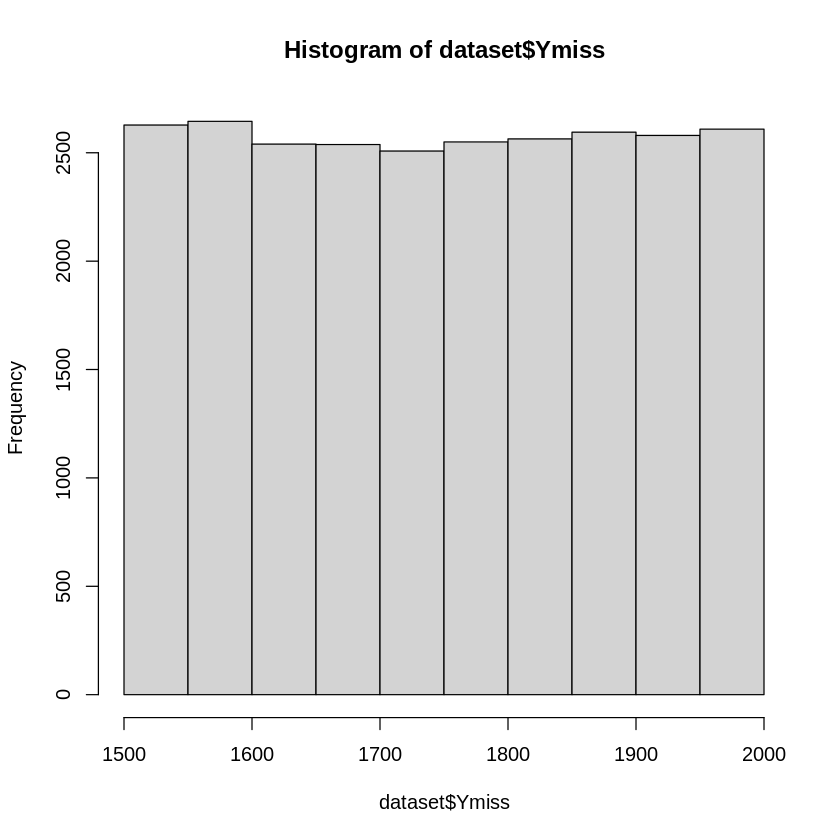

In [43]:
hist(dataset$Ymiss)

In [69]:
# Split the dataset
notNull <- dataset[, 5:8]
Null <- dataset[, 1:4]
set.seed(123)
s_size <- floor(0.66 * nrow(notNull))
train_v <- sample(seq_len(nrow(notNull)), size = s_size)
train <- notNull[train_v, ]
test <- notNull[-train_v, ]

In [70]:
head(train)

,region,gender,marital,Ymiss
,<chr>,<chr>,<chr>,<dbl>
51663,Gaza,Male,Single,NA
57870,West bank,Female,Married,NA
2986,Gaza,Male,Divorced,1654
29925,West bank,Male,Married,NA
95246,West bank,Female,Single,1932
68293,Gaza,Female,Single,NA


In [71]:
# Model
model_fit <- rpart(Ymiss ~., data = train, method = 'class')
summary(model_fit)


Call:
rpart(formula = Ymiss ~ ., data = train, method = "class")
  n=17063 (48937 observations deleted due to missingness)

           CP nsplit rel error xerror xstd
1 0.000411571      0         1      0    0

Node number 1: 17063 observations
  predicted class=1868  expected loss=0.9967767  P(node) =1
    class counts:    33    34    32    36    41    42    27    29    26    30    28    41    31    37    39    34    33    36    38    30    25    41    30    24    29    42    38    40    50    40    34    22    43    42    44    25    38    33    38    41    34    29    31    35    34    32    28    32    33    35    33    30    29    47    26    26    40    41    32    27    41    32    34    45    34    34    43    29    42    35    34    34    24    36    24    36    29    32    32    39    32    38    21    39    42    49    43    32    39    31    33    36    39    37    34    28    35    49    29    36    30    29    31    39    29    31    45    41    23    33    22    37    30

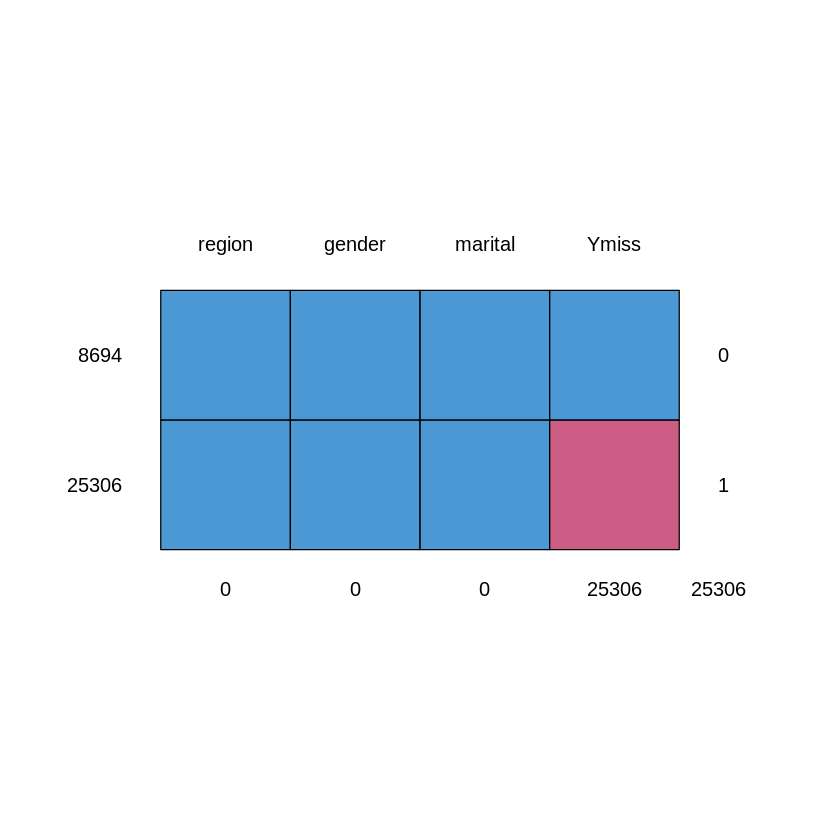

In [73]:
# Impute values of Ymiss
val <- md.pattern(test)

In [ ]:
#impute values complete case analysis
impute <- mice(test, m=5, maxit = 100, method = 'pmm', seed = 1000)
summary(impute)

In [ ]:
head(impute)

In [93]:
# compare and comple
rmspe <- rmse(test$Ymiss, dataset$income)
summary(rmspe)

Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     NA      NA      NA     NaN      NA      NA       1 